# EJERCICIOS DE REGRESION LINEAL EN PYTHON

#### CRISTIAN ANDRES VILLACIS MENDOZA
### DESARROLLO DE SOFTWARE


# link de GITHUB: https://github.com/villacis-cristian/ejercicios_en_clase_python.git

# El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
np.random.seed(42)
num_equipos = np.random.randint(1, 100, size=100)  # Entre 1 y 100 equipos afectados
coste = 500 * num_equipos + np.random.normal(0, 2000, size=100)  # Coste base más ruido
coste = np.abs(coste)  # Asegurar que no hay costes negativos


In [3]:
# Crear DataFrame
data = pd.DataFrame({'Equipos_Afectados': num_equipos, 'Coste': coste})


In [ ]:
print("Primeras filas del dataset:")
print(data.head())



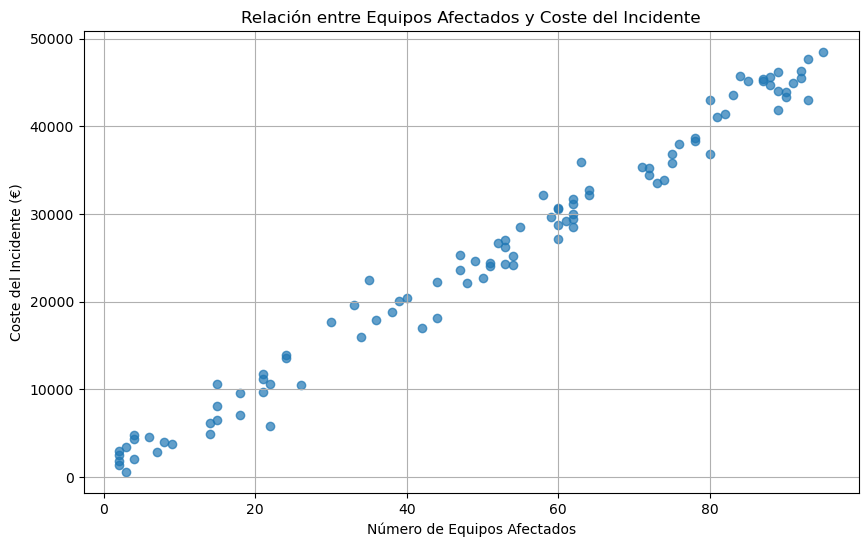

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Equipos_Afectados'], data['Coste'], alpha=0.7)
plt.title('Relación entre Equipos Afectados y Coste del Incidente')
plt.xlabel('Número de Equipos Afectados')
plt.ylabel('Coste del Incidente (€)')
plt.grid(True)
plt.show()


In [5]:
X = data[['Equipos_Afectados']]
y = data['Coste']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluación del modelo:")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


NameError: name 'y_pred' is not defined

In [9]:

# Mostrar coeficientes
print("\nCoeficientes del modelo:")
print(f"Intercepto (coste base): {modelo.intercept_:.2f} €")
print(f"Coste por equipo afectado: {modelo.coef_[0]:.2f} €")


Coeficientes del modelo:
Intercepto (coste base): 452.40 €
Coste por equipo afectado: 489.69 €


In [10]:
# Predecir para nuevos valores
nuevos_equipos = np.array([[5], [20], [50], [100]])  # Ejemplos para predecir
predicciones = modelo.predict(nuevos_equipos)

print("\nPredicciones de ejemplo:")
for equipos, coste_pred in zip(nuevos_equipos, predicciones):
    print(f"{equipos[0]} equipos afectados: {coste_pred:.2f} €")



Predicciones de ejemplo:
5 equipos afectados: 2900.85 €
20 equipos afectados: 10246.19 €
50 equipos afectados: 24936.86 €
100 equipos afectados: 49421.33 €


C:\Users\andrakolis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


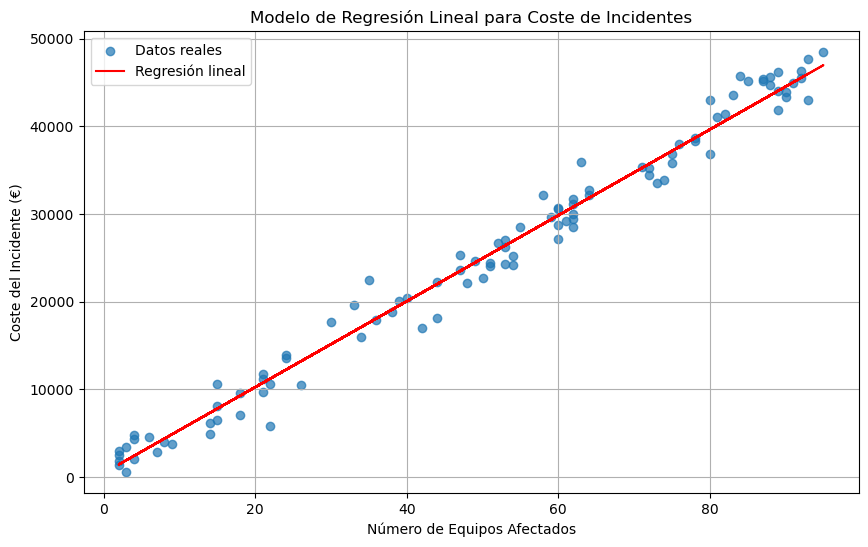

In [11]:
# Visualizar la regresión
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Datos reales')
plt.plot(X, modelo.predict(X), color='red', label='Regresión lineal')
plt.title('Modelo de Regresión Lineal para Coste de Incidentes')
plt.xlabel('Número de Equipos Afectados')
plt.ylabel('Coste del Incidente (€)')
plt.legend()
plt.grid(True)
plt.show()